<a href="https://colab.research.google.com/github/ianmuchai/Smartphone-sales-dataset/blob/main/Smartphones_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [15]:
uploaded = files.upload()

Saving amazon_top_rated_smartphones.csv to amazon_top_rated_smartphones (1).csv


In [17]:
file_name = 'amazon_top_rated_smartphones.csv'

In [18]:
data=pd.read_csv(file_name)

In [19]:
data.head()

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
3,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.2 out of 5 stars,"95,519","₹13,999","₹15,999","Save ₹2,000 (13%)",FREE Delivery by Amazon,NaN
4,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN


In [20]:
# Extracting numeric value from Rating
data['Rating'] = data['Rating'].str.extract('(\d+\.\d+)').astype(float)

In [21]:
# Removing commas from Reviews count and converting to integer
data['Reviews count'] = data['Reviews count'].str.replace(',', '').astype(int)

In [22]:
# Converting Offer price and Actual price to numeric after removing currency symbols and commas
data['Offer price'] = data['Offer price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['Actual price'] = data['Actual price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [23]:
# Extracting savings amount and savings percentage
data['Saving Amount'] = data['Saving'].str.extract('Save ₹(\d+,\d+|\d+)').replace(',', '', regex=True).astype(float)
data['Saving Percentage'] = data['Saving'].str.extract('(\d+)%').astype(float)

In [24]:
# Drop original 'Saving' column
data.drop(columns='Saving', inplace=True)

In [25]:
data.head()

,Smartphone,Rating,Reviews count,Offer price,Actual price,Delivery,Status of stock & more offers,Saving Amount,Saving Percentage
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2,87809,9499.0,10999.0,FREE Delivery by Amazon,NaN,1500.0,14.0
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2,74587,6999.0,8499.0,FREE Delivery by Amazon,NaN,1500.0,18.0
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2,74587,6999.0,8499.0,FREE Delivery by Amazon,NaN,1500.0,18.0
3,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.2,95519,13999.0,15999.0,FREE Delivery by Amazon,NaN,2000.0,13.0
4,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2,87809,9499.0,10999.0,FREE Delivery by Amazon,NaN,1500.0,14.0


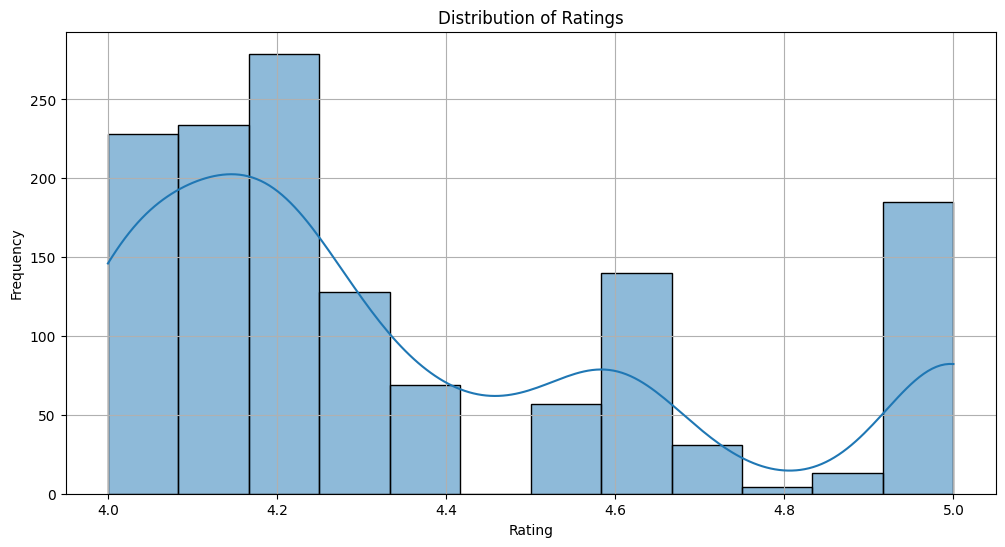

In [26]:
# Rating Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['Rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
# Summary statistics for Rating
rating_summary = data['Rating'].describe()
rating_summary

count    1368.000000
mean        4.350365
std         0.326875
min         4.000000
25%         4.100000
50%         4.200000
75%         4.600000
max         5.000000
Name: Rating, dtype: float64

In [28]:
# Price Analysis
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

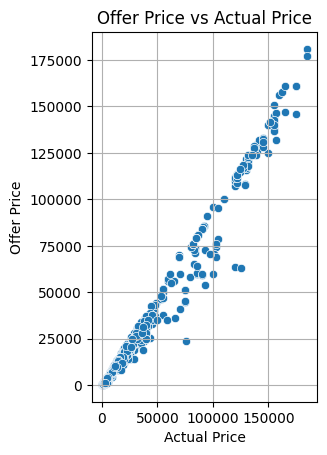

In [29]:
# Offer Price vs Actual Price
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Actual price', y='Offer price')
plt.title('Offer Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Offer Price')
plt.grid(True)

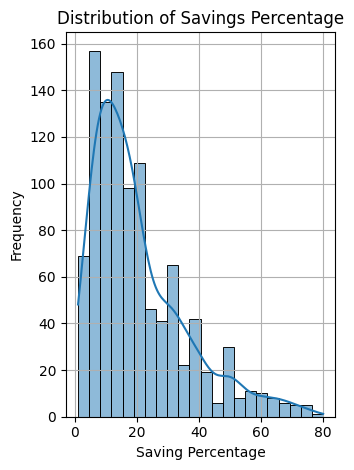

In [33]:
# Distribution of Savings Percentage
plt.subplot(1, 2, 2)
sns.histplot(data['Saving Percentage'], kde=True)
plt.title('Distribution of Savings Percentage')
plt.xlabel('Saving Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Summary statistics for Price and Saving Percentage
price_savings_summary = data[['Offer price', 'Actual price', 'Saving Percentage']].describe()
price_savings_summary

,Offer price,Actual price,Saving Percentage
count,1154.000000,1042.000000,1041.000000
mean,24495.751768,27782.650672,20.299712
std,34351.755946,37484.770228,15.279778
min,50.000000,299.000000,1.000000
25%,1830.500000,2499.000000,9.000000
50%,12999.000000,15000.000000,16.000000
75%,25990.000000,30990.000000,28.000000
max,180890.000000,184800.000000,80.000000


In [37]:
# Popularity Analysis based on the number of reviews

# Top 5 Most Popular Smartphones
most_popular = data.nlargest(5, 'Reviews count')[['Smartphone', 'Reviews count', 'Rating']]
# Top 5 Least Popular Smartphones
least_popular = data.nsmallest(5, 'Reviews count')[['Smartphone', 'Reviews count', 'Rating']]

most_popular, least_popular

(                                           Smartphone  Reviews count  Rating
 11  Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...         243715     4.3
 94  Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...         243715     4.3
 13  Samsung Galaxy M21 2021 Edition (Arctic Blue, ...         170469     4.2
 25  Samsung Galaxy M21 2021 Edition (Charcoal Blac...         170469     4.2
 45  Samsung Galaxy M21 2021 Edition (Arctic Blue, ...         170469     4.2,
                                             Smartphone  Reviews count  Rating
 274  MOTOROLA G40 Fusion (Frosted Champagne, 128 GB...              1     5.0
 372                                DIZO Star 300 Black              1     5.0
 502                         Micromax X389 (Black+Grey)              1     5.0
 541                             Lava A3 Dark Blue/Grey              1     4.0
 564  Nillkin Case for Apple iPhone 12 / iPhone 12 P...              1     5.0)

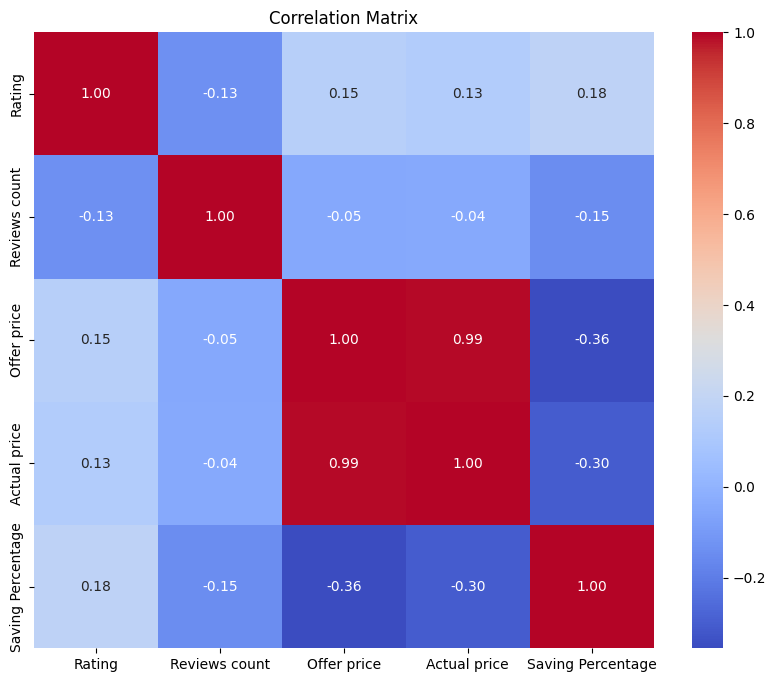

,Rating,Reviews count,Offer price,Actual price,Saving Percentage
Rating,1.000000,-0.133953,0.152677,0.130213,0.179047
Reviews count,-0.133953,1.000000,-0.045603,-0.039026,-0.148590
Offer price,0.152677,-0.045603,1.000000,0.991004,-0.355260
Actual price,0.130213,-0.039026,0.991004,1.000000,-0.303743
Saving Percentage,0.179047,-0.148590,-0.355260,-0.303743,1.000000


In [39]:
# Correlation Analysis
correlation_matrix = data[['Rating', 'Reviews count', 'Offer price', 'Actual price', 'Saving Percentage']].corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

correlation_matrix